# 🧠 Anomaly Detection with Autoencoders  
**Author**: Harsh Diwaker  
**Roll Number**: 210108015  

---

## 📍 Introduction & Motivation

In today’s world, data is everywhere — from credit card transactions and server logs to sensor readings in manufacturing units. While most of this data follows expected patterns, some points deviate from the norm. These are **anomalies** — and detecting them is crucial.

But here's the challenge:  
Anomalies are rare. They're hard to label. And they don't always look the same. Traditional methods often fail because they:

- Rely heavily on predefined thresholds or assumptions
- Struggle with high-dimensional, noisy data
- Don’t generalize well across domains

That’s what drew me to **Autoencoders**, a type of neural network designed to learn efficient representations of data. They offer a compelling solution to anomaly detection because:

- ✅ They work **unsupervised**, needing no labeled anomalies  
- ✅ They learn to **reconstruct normal behavior** accurately  
- ✅ Poor reconstruction signals **something unusual** — i.e., an anomaly  

This simple yet powerful idea forms the basis of this project:

> **Teach a model what normal looks like — and let it flag everything else.**

Through this work, I explore how autoencoders can detect anomalies in tabular datasets, evaluate their performance through reconstruction error, and reflect on their practical utility. What makes this approach especially exciting is its flexibility — it can be adapted across domains where “abnormal” isn’t easily defined in advance.

Ultimately, my goal is to understand not just *how well* this method works, but also *why* it works — and where its limitations lie.




## 🧩 Background & Connection to Multimodal Learning

At the heart of this project lies the **autoencoder** — a simple yet powerful neural network architecture designed to learn compressed representations of data. First introduced in the 1980s as a method for unsupervised learning, autoencoders have since evolved into a cornerstone of deep learning research, especially in representation learning.

### 🧭 Historical Evolution

Autoencoders began as shallow models, often used as alternatives to Principal Component Analysis (PCA). But with the advent of deep learning, they took on more expressive forms:

- **Deep Autoencoders**: Multiple hidden layers for complex representation learning.
- **Convolutional Autoencoders**: Better suited for spatial data like images.
- **Variational Autoencoders (VAEs)**: Introduced probabilistic latent spaces and inspired generative modeling.

This evolution has also influenced their role in **anomaly detection**, particularly in fields where traditional statistical assumptions break down.

### 🔗 Connection to Multimodal Learning

Multimodal learning involves integrating and learning from multiple data types — for example, combining text with images, or audio with video. The relevance of autoencoders in this space lies in their **encoder-decoder architecture**, which is foundational to many multimodal systems:

- In models like **multimodal transformers**, the encoder is tasked with learning shared representations across modalities.
- Autoencoders help align different input types to a **common latent space**, making it easier for downstream tasks (e.g., classification, generation, anomaly detection).
- For example, an audio-visual anomaly detection system might use a **dual-stream autoencoder** to learn whether visual and sound features align — and signal a problem when they don’t.

While this project focuses on a single modality (tabular data), the principles at play here — compress, reconstruct, detect — scale to much broader settings, making autoencoders an essential building block in the deep learning ecosystem.

---




## 🔍 How Do Autoencoders Work?

Autoencoders are a class of neural networks designed to **reconstruct their input**. At first glance, this might sound trivial — why build a model just to reproduce what you already have? But the beauty of an autoencoder lies in **how** it reconstructs.

The key idea is to force the model to learn a **compressed internal representation** (also called a "latent space") of the input data. If it can accurately reconstruct the original data from this compressed version, it must have learned the most essential features of that data.


---

## 🛠️ Architecture Breakdown

An autoencoder consists of two main components:

### 1. Encoder  
Maps the input data \( x \) to a lower-dimensional latent vector \( z \):  

$$ z = f_{\text{encoder}}(x) $$

### 2. Decoder  
Reconstructs the input from the latent vector \( z \):  

$$ \hat{x} = f_{\text{decoder}}(z) $$

### 3. Loss Function  
Measures how different the reconstruction \( \hat{x} \) is from the original input \( x \).  
A common choice is **Mean Squared Error (MSE)**:

$$ \text{Loss} = \| x - \hat{x} \|^2 $$

---

### 💡 Why This Helps with Anomaly Detection

Autoencoders are trained only on **normal data**. As a result:

- When they see similar (normal) data again, they **reconstruct it well**.
- When they encounter **anomalous data**, which they haven’t seen before, the reconstruction is poor.

This leads to a high reconstruction error — and that’s the signal we use to flag anomalies.


---

Autoencoders, therefore, act as **filters of normality**. Anything that doesn't pass cleanly through the filter might just be the anomaly we’re looking for.


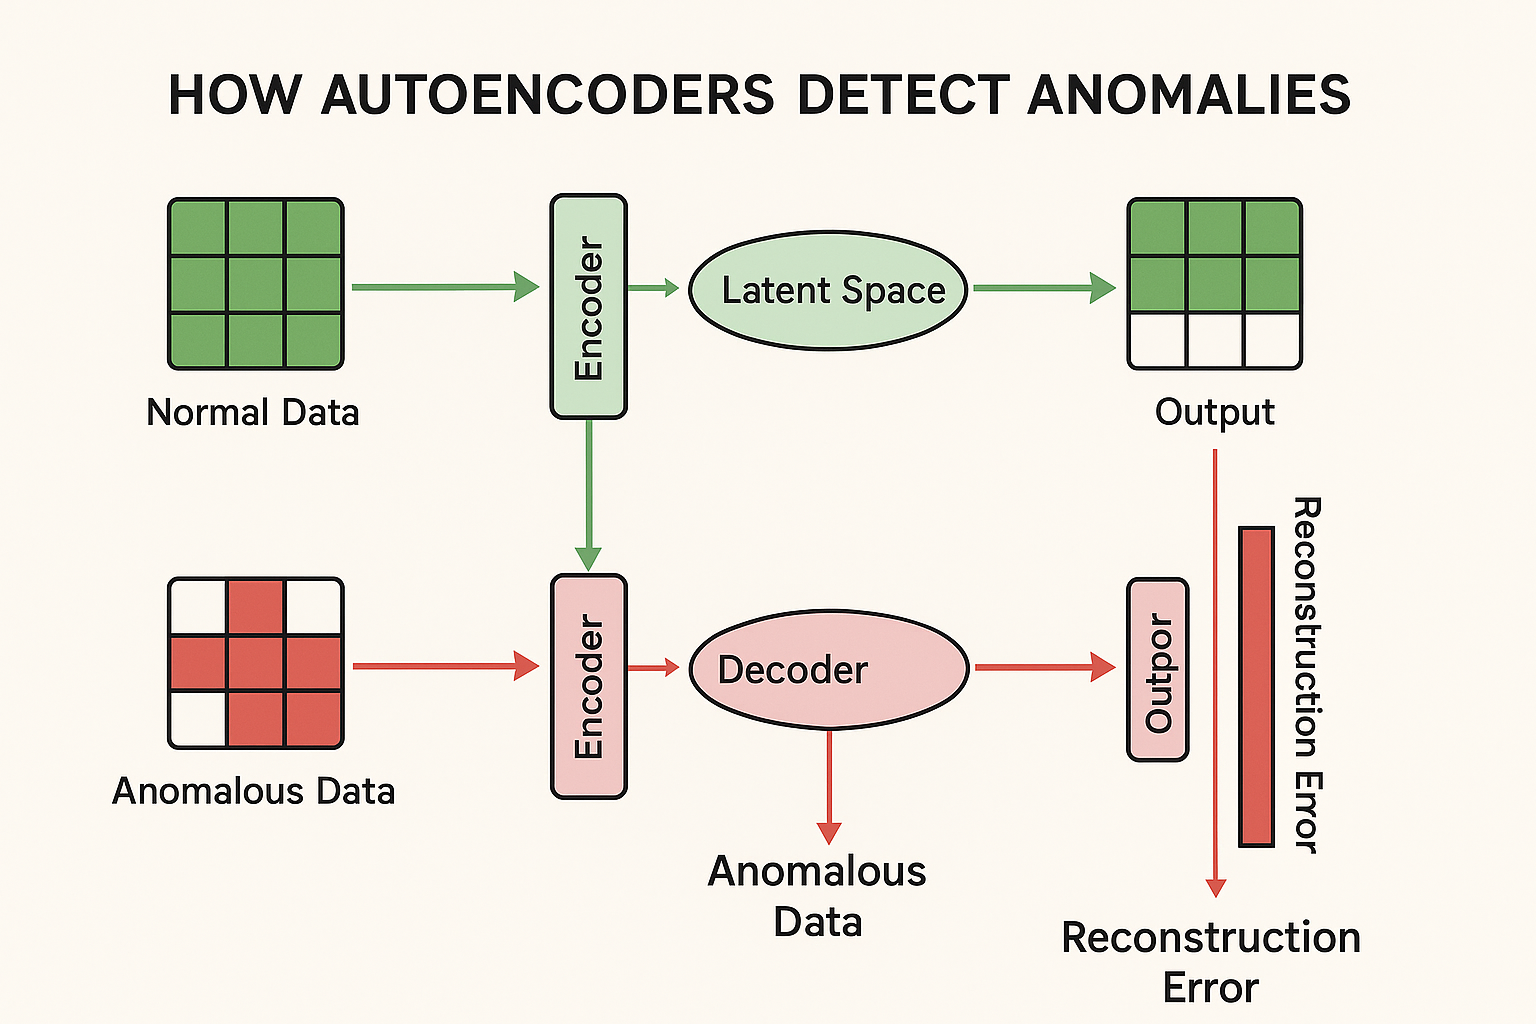

In [ ]:
from IPython.display import Image, display

# Display the uploaded image from input path
display(Image(filename='/kaggle/input/image-1/image-1.png'))



## ✅ What This Project Covers

This project explores the use of autoencoders for identifying fraudulent transactions in a retail dataset. The entire pipeline is structured to simulate a real-world anomaly detection scenario using unsupervised learning. Here's what I did:

By the end of this project, I gained hands-on experience in using neural networks for unsupervised anomaly detection — and observed firsthand how deep learning can reveal hidden insights in structured tabular data.



# Setup

In this section, we will import the necessary libraries, configure the environment, and load the dataset.

We will be using:
- **NumPy** and **Pandas** for data manipulation
- **Matplotlib** and **Seaborn** for data visualization
- **TensorFlow / Keras** for building the autoencoder
- **Scikit-learn** for preprocessing and evaluation metrics
  
# GPU used

We are using the GPU t4x2.

We will also check if a GPU is available to accelerate model training. If a GPU is detected, TensorFlow will automatically use it for computations.

Let’s begin by setting up the environment and preparing the data pipeline.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 10

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mae
from tensorflow.keras.metrics import Mean
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

2025-05-09 06:23:59.776750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746771840.215752      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746771840.348125      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading Data

In [ ]:
df = pd.read_csv('/kaggle/input/creditcard/card_transdata.csv')
df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


### Shape of Dataset

In [4]:
print(f"Columns: {df.shape[1]}\nSamples: {df.shape[0]}")

Columns: 8
Samples: 1000000


### Checking for Null Values

In [5]:
any(df.isna().sum() > 0)

False

### Basic Statistics

Before proceeding with modeling, it's important to understand the structure and distribution of the dataset. This includes:

- The number of **features and samples** in the dataset
- The **data types** of each feature and how many non-null values they contain
- Whether there are any **missing values**
- Summary statistics such as **mean**, **standard deviation**, **minimum**, **maximum**, and **quartiles** for each numerical column

In the code below, we use the following:
- `df.info()` to examine column types and null counts
- `df.shape` to get the number of rows and columns
- `df.isna().sum()` to check for missing values
- `df.describe()` to generate descriptive statistics for numeric features

These checks help identify any necessary **data cleaning steps** and give an early sense of potential **anomalies or skewed distributions**.


In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
cat_feats = [x for x in df.columns if len(df[x].unique()) <=2]
num_feats = [x for x in df.columns if x not in cat_feats]

---

## 📊 Exploratory Data Analysis (EDA)

Before diving into model building, I conducted a detailed EDA to understand the structure, balance, and underlying relationships in the retail transaction dataset. Since this is a fraud detection task, the key focus was on uncovering how fraudulent transactions differ from genuine ones.

---

### ⚖️ Class Imbalance

A pie chart of the target variable reveals a significant class imbalance:

- **Genuine Transactions**: ~91.3%  
- **Fraudulent Transactions**: ~8.7%

This imbalance is critical because it means a naive model could perform well by predicting "non-fraud" all the time — so we must carefully design a system that is sensitive to the rare, high-impact fraud cases.

---

### 🔗 Correlation Analysis

A correlation matrix helped identify features that are most indicative of fraud. Notable observations:

- `ratio_to_median_purchase_price` and `online_order` show a **moderate correlation with fraud** (≈ 0.46 and 0.19 respectively).
- Most other features have very weak or near-zero linear correlations, highlighting the **nonlinear** nature of patterns in fraud detection — a perfect setup for using autoencoders.

---

### 📈 Feature Distributions by Class

Several features show distinctly different distributions for fraudulent vs. genuine transactions:

- **`distance_from_home`**: Fraudulent transactions tend to occur **farther** from the user's home.
- **`distance_from_last_transaction`**: There is more variability and longer distances in fraud cases.
- **`repeat_retailer`, `used_chip`, `used_pin_number`, and `online_order`**:
  - Fraudulent transactions are **less likely to use chips or PINs**
  - They are **more common in online purchases** and at **non-repeat retailers**

This gives valuable hints — fraud often involves behavior that is unusual for the customer or contextually risky.

---

### 🛠️ Feature Engineering (Context)

As part of preprocessing, I scaled numerical variables and preserved categorical ones to retain interpretability. Given the nature of autoencoders, we removed the target label and trained only on the **genuine transactions**, allowing the model to learn the pattern of "normal behavior."

---

### 🧾 Summary

The dataset presents a realistic, noisy, and imbalanced environment — perfect for testing unsupervised anomaly detection methods. The exploratory analysis guided feature selection and confirmed that fraud signals are subtle and spread across several behavioral dimensions, reinforcing the need for a model capable of capturing non-obvious patterns.

---


In [8]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

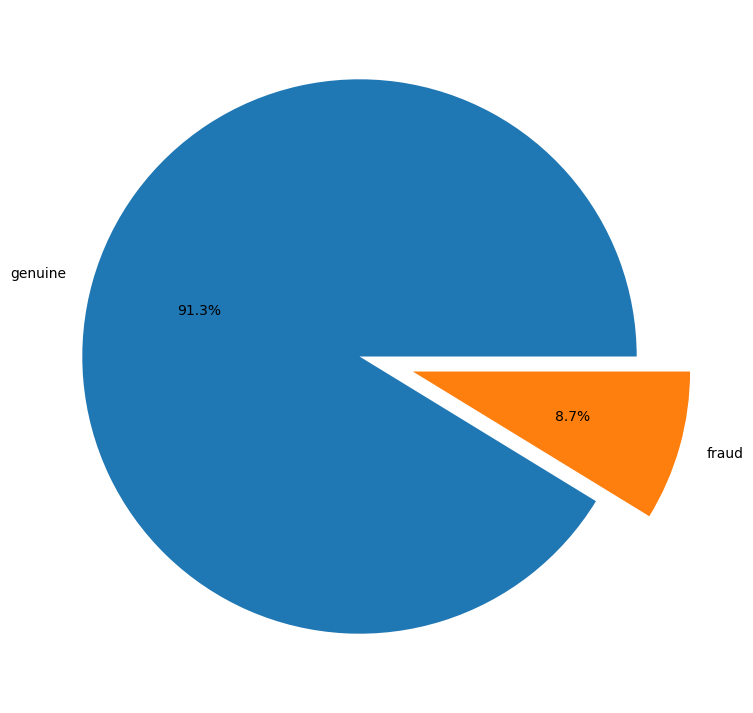

In [9]:
vc = df['fraud'].value_counts(ascending=False)

plt.pie(x=vc.values, labels=['genuine','fraud'], explode=[0.0, 0.2], autopct='%1.1f%%')
plt.show()

### Inferences
* The dataset is heavily **imbalanced**
* The autoencoders only require instances of `genuine` samples for training
* The `fraud` samples will be used for testing

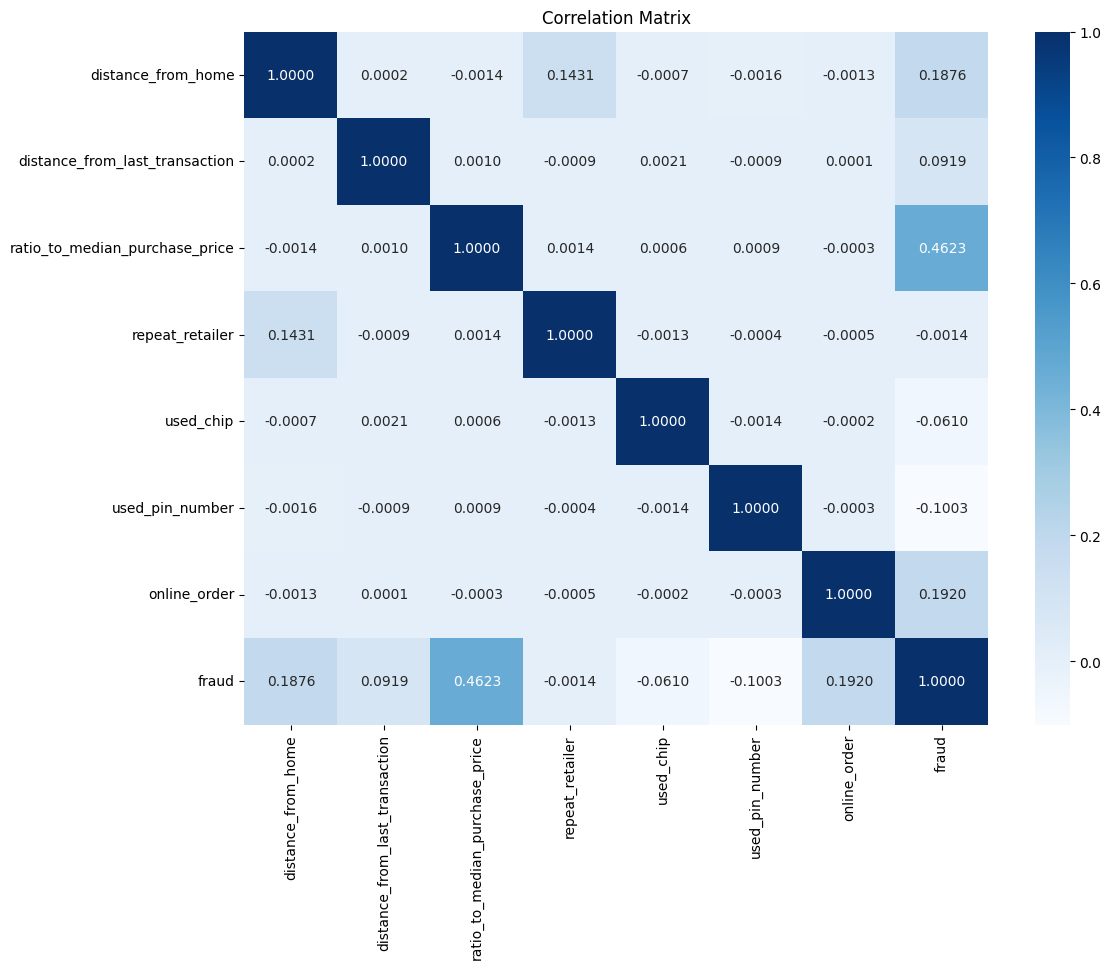

In [10]:
sns.heatmap(df.corr(), annot=True, fmt='.4f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

### Inferences
* Most correlation values are very close to 0, which indicates that our features are **weakly correlated**
* PCA assumes linearity in the data, and it does not work well with Non-linear features
* This is where **Autoencoders** prove to be useful, since they can capture the complex relationships in the data

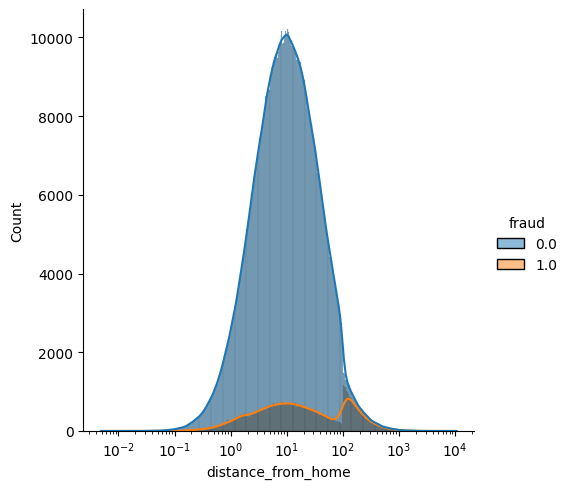

In [11]:
sns.displot(data=df, x='distance_from_home', hue='fraud', log_scale=True, kde=True)
plt.show()

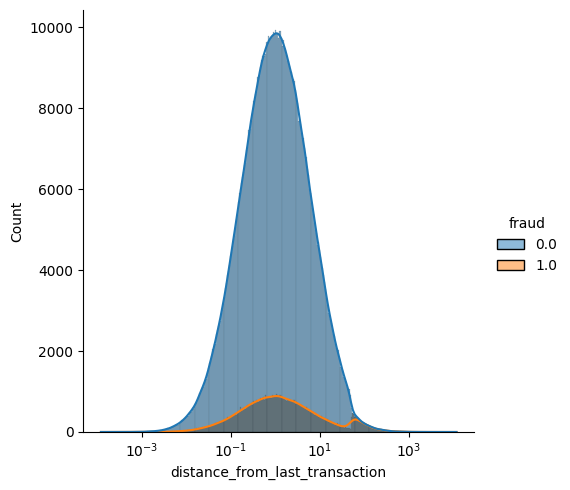

In [12]:
sns.displot(data=df, x='distance_from_last_transaction', hue='fraud', log_scale=True, kde=True)
plt.show()

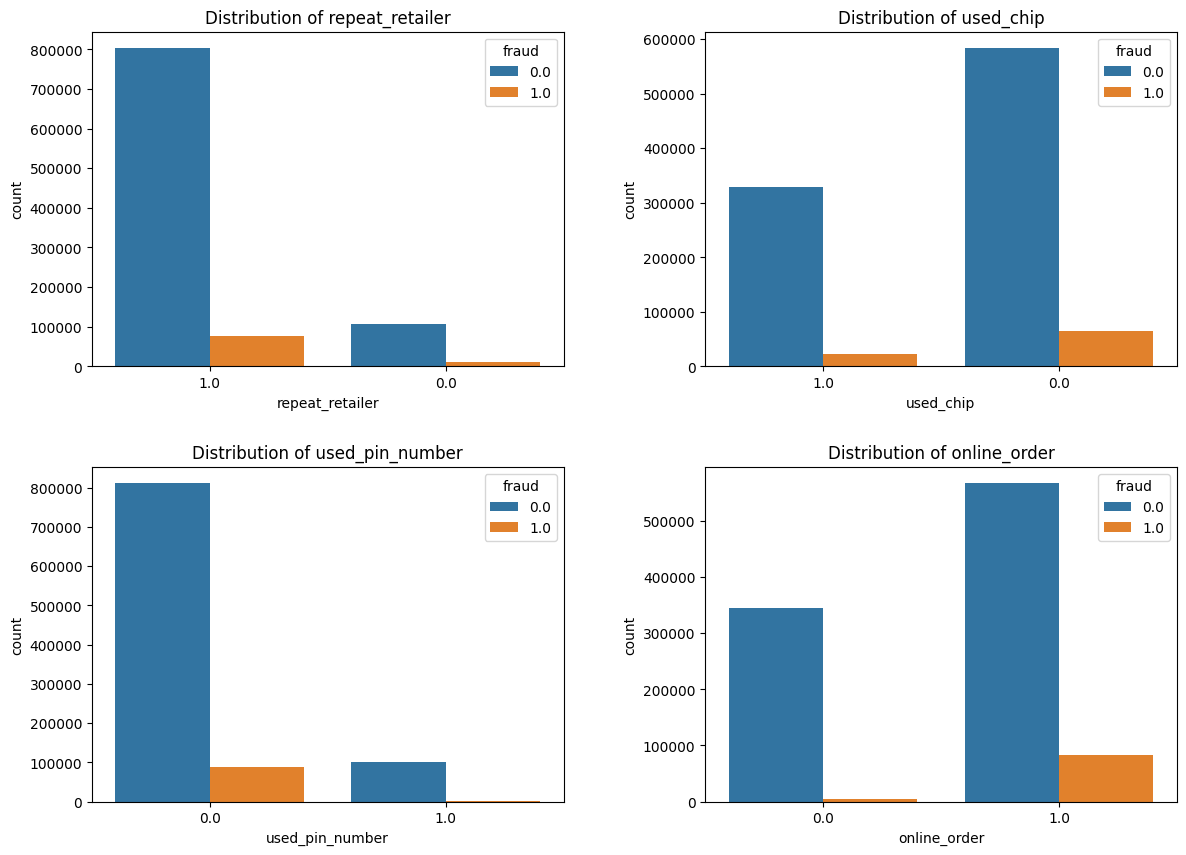

In [13]:
feats_to_plot = df.columns[3:-1]
plt.figure(figsize=(14,10))
for i, col in enumerate(feats_to_plot):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[col].astype(str), hue=df['fraud'])
    plt.title(f'Distribution of {col}')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

# Feature Engineering

In [14]:
ct = make_column_transformer(
    (StandardScaler(), num_feats)
)

df_scaled = pd.DataFrame(ct.fit_transform(df), columns=num_feats)
df_cat_feats = df[cat_feats]

df_concat = pd.concat([df_scaled, df_cat_feats], axis=1)
df_concat.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.0,1.0,0.0,0.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,0.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0,0.0
3,-0.372854,0.021806,-0.522048,1.0,1.0,0.0,1.0,0.0
4,0.268572,-0.172968,0.142373,1.0,1.0,0.0,1.0,0.0


### For anomaly detection, we only need genuine class of the data

Since we want the model to only learn and fit on normal data, we only use the `genuine` class. This is to ensure that when an abnormal input is given to the model, its reconstruction error will be higher than that of a normal input. For testing of the model, samples from both the classes will be used.

In [15]:
X = df_concat.drop(['fraud'], axis=1)
y = df_concat['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

X_train_genuine = X_train[~y_train]
X_test_genuine = X_test[~y_test]

X_train_fraud = X_train[y_train]
X_test_fraud = X_test[y_test]

# Model Building - Autoencoder



## 🧪 Model Design & Training Approach

Having explored the theory behind autoencoders, this section focuses on how the model was practically built and trained for fraud detection.

---

### 🧱 Implementation Details

The autoencoder architecture was built using a symmetric **encoder-decoder** structure with progressively shrinking and expanding **Dense layers**:

- The **encoder** compresses the input features through two layers:
  - `Dense(64)` → `Dense(16)` → `Dense(2)` (the latent space)
- The **decoder** mirrors this by expanding back:
  - `Dense(16)` → `Dense(64)` → final output layer matching the input shape

Each layer uses the **ReLU activation function**, which helps the model capture non-linear patterns in the input data.

> 🧠 *Why CODE_DIM = 2?*  
Reducing the data to just two latent dimensions makes the internal structure easier to visualize, and forces the model to focus only on the most critical patterns during compression.

---

### 🔄 Loss Function and Optimizer

The model is compiled using:

- **Loss**: Mean Absolute Error (MAE) — chosen for its robustness against outliers
- **Optimizer**: Adam — an adaptive gradient-based optimizer that performs well in most deep learning scenarios

---

### 📉 Model Monitoring with Callbacks

To ensure optimal training, two essential callbacks were used:

- **ModelCheckpoint**: Saves the best model based on validation loss.
- **EarlyStopping**: Stops training if validation loss does not improve for 5 consecutive epochs, restoring the best weights to avoid overfitting.

---

### 🏋️‍♂️ Training Logic

The model was trained using only **genuine (non-fraud)** transactions to learn the baseline behavior:

```python
autoencoder.fit(
    X_train_genuine, X_train_genuine,
    epochs=25,
    batch_size=64,
    validation_data=(X_test, X_test),
    callbacks=[checkpoint, earlystopping],
    shuffle=True
)


In [16]:
CODE_DIM = 2
INPUT_SHAPE = X_train.shape[1]

input_layer = Input(shape=(INPUT_SHAPE,))
x = Dense(64, activation='relu')(input_layer)
x = Dense(16, activation='relu')(x)
code = Dense(CODE_DIM, activation='relu')(x)
x = Dense(16, activation='relu')(code)
x = Dense(64, activation='relu')(x)
output_layer = Dense(INPUT_SHAPE, activation='relu')(x)

autoencoder = Model(input_layer, output_layer, name='anomaly')

I0000 00:00:1746771880.881046      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746771880.881830      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


### Model Callbacks

In [20]:
model_name = "anomaly.weights.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            save_weights_only=True,
                            verbose=1)
earlystopping = EarlyStopping(monitor='val_loss',
                              min_delta = 0, 
                              patience = 5, 
                              verbose = 1,
                              restore_best_weights=True)

callbacks = [checkpoint, earlystopping]

### Compilation

In [21]:
autoencoder.compile(loss='mae',
                    optimizer=Adam())

### Training

In [22]:
history = autoencoder.fit(X_train_genuine, X_train_genuine,
                          epochs=25, batch_size=64,
                          validation_data=(X_test, X_test),
                          callbacks=callbacks, shuffle=True)

Epoch 1/25


I0000 00:00:1746771983.204493      83 service.cc:148] XLA service 0x7a71b000eea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746771983.206115      83 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746771983.206149      83 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746771983.570400      83 cuda_dnn.cc:529] Loaded cuDNN version 90300


  116/11408 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.3636

I0000 00:00:1746771984.872541      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11408/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2249
Epoch 1: val_loss improved from inf to 0.22207, saving model to anomaly.weights.h5
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.2249 - val_loss: 0.2221
Epoch 2/25
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2021
Epoch 2: val_loss improved from 0.22207 to 0.22123, saving model to anomaly.weights.h5
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.2021 - val_loss: 0.2212
Epoch 3/25
11370/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2019
Epoch 3: val_loss improved from 0.22123 to 0.22076, saving model to anomaly.weights.h5
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.2019 - val_loss: 0.2208
Epoch 4/25
11369/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2019
Epoch 4: val_loss improved from 0.22076 to 0.22029, saving model to anomaly.weights.h5
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.2019 - val_loss: 0.2203
Epoch 5/25
11376/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

### Results

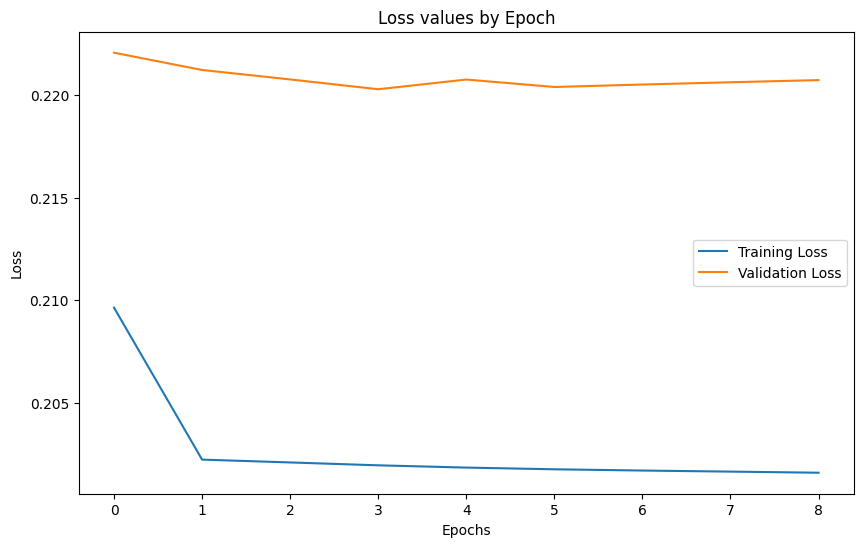

In [23]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss values by Epoch")
plt.show()

# Reconstruction

It refers to the process of using the learned compressed representation of the input data to generate a reconstruction of the original input. The reconstruction is generated by passing the compressed representation through the decoder portion of the autoencoder. The goal of the autoencoder is to learn a compressed representation of the input data that can be used to generate accurate reconstructions of the original input.

![reconstruction](https://miro.medium.com/v2/resize:fit:777/1*ce89U6z-MhgGRln9VRAMxQ.png)

Here, `x-x'` represents the **Reconstruction Error**. 

We will start by making a prediction on the test set which consists of both classes. After this, we can define a threshold and a metric, depending upon the need. The idea is simple:
* If the Reconstruction error is lower than the threshold, the sample is `genuine`
* If the Reconstruction error is higher than the threshold, the sample is `fraud`

This is because the model was trained with samples of `genuine` class, so anything outside of this threshold is considered an anomaly.

In [24]:
reconstructions = autoencoder.predict(X_test, verbose=0)
reconstruction_error = mae(reconstructions, X_test)

### Create Dataframe with `reconstruction error` and `true` labels

In [25]:
recons_df = pd.DataFrame({
    'error': reconstruction_error,
    'y_true': y_test
}).reset_index(drop=True)
recons_df.head()

,error,y_true
0,0.115347,False
1,0.060502,False
2,0.302714,True
3,0.095729,False
4,0.291369,False


### Finding the Ideal Threshold

Choosing the right threshold is crucial in anomaly detection with autoencoders because it determines the tradeoff between detecting anomalies and generating false positives. The threshold determines the cutoff point for the reconstruction error, above which a data point is classified as anomalous. If the threshold is set too low, the autoencoder will classify many normal data points as anomalies, resulting in a high false positive rate. On the other hand, if the threshold is set too high, the autoencoder may miss some true anomalies, resulting in a high false negative rate.

The metric we will choose for this problem is Recall, as we want to reduce False Negatives. Any Fraud transcation classified as Genuine may lead to unnoticed problems in the system, since there will never be anomaly detected. To find the right threshold value, several values will be tested to find the best combination of metrics. While our goal is to improve Recall, we will also keep track of the accuracy. The tested values will be percentiles of the reconstruction error values.  

In [26]:
def thresholdTuning(df, iterations):
    
    thresh_df = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': []
    }
    
    for i in range(iterations):
        thresh_value = df['error'].quantile(i/iterations)
        preds = df['error'] > thresh_value
        cr = classification_report(df['y_true'], preds, output_dict=True)
        acc = cr['accuracy']
        prec = cr['macro avg']['precision']
        rc = cr['macro avg']['recall']
        
        thresh_df['threshold'].append(thresh_value)
        thresh_df['accuracy'].append(acc)
        thresh_df['precision'].append(prec)
        thresh_df['recall'].append(rc)
        
        print(f"Threshold: {thresh_value:.4f}\tAccuracy: {acc:.3f}\t\tPrecision: {prec:.3f}\tRecall Score: {rc:.3f}")
        
    return pd.DataFrame(thresh_df)
        
thresh_df = thresholdTuning(recons_df, 10)

Threshold: 0.0027	Accuracy: 0.087		Precision: 0.544	Recall Score: 0.500
Threshold: 0.0813	Accuracy: 0.185		Precision: 0.541	Recall Score: 0.547
Threshold: 0.1031	Accuracy: 0.283		Precision: 0.548	Recall Score: 0.596
Threshold: 0.1220	Accuracy: 0.381		Precision: 0.555	Recall Score: 0.645
Threshold: 0.1423	Accuracy: 0.479		Precision: 0.564	Recall Score: 0.693
Threshold: 0.1860	Accuracy: 0.570		Precision: 0.570	Recall Score: 0.719
Threshold: 0.2311	Accuracy: 0.650		Precision: 0.570	Recall Score: 0.711
Threshold: 0.2586	Accuracy: 0.738		Precision: 0.587	Recall Score: 0.730
Threshold: 0.2864	Accuracy: 0.827		Precision: 0.624	Recall Score: 0.748
Threshold: 0.3777	Accuracy: 0.888		Precision: 0.660	Recall Score: 0.680


In [27]:
threshold = thresh_df[thresh_df['recall'] == thresh_df['recall'].max()]['threshold'].values[0]
print(f"Threshold with Maximum Recall: {threshold:.6f}")

Threshold with Maximum Recall: 0.286447


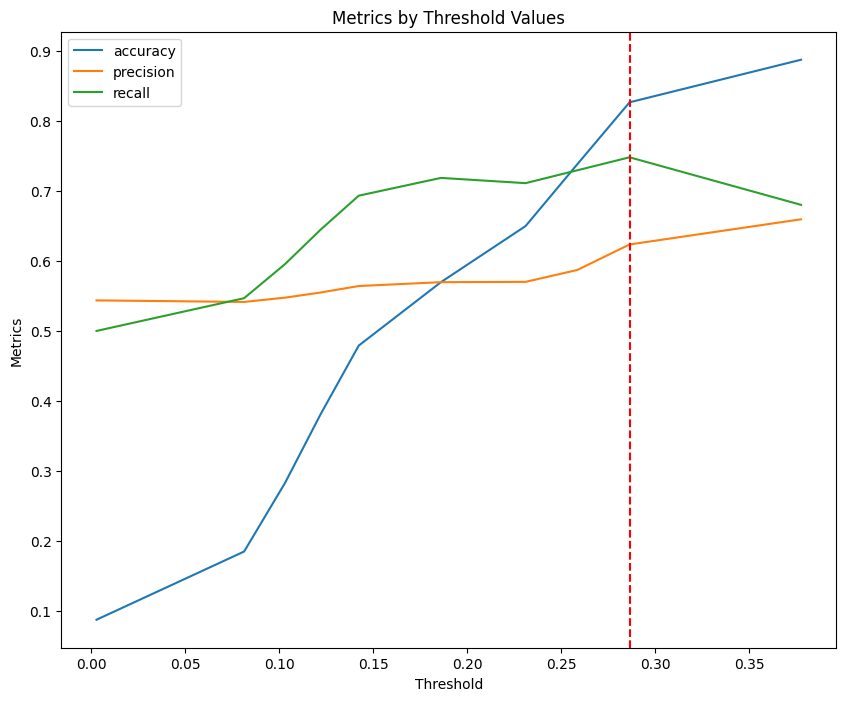

In [28]:
plt.figure(figsize=(10,8))
plt.plot(thresh_df['threshold'], thresh_df['accuracy'], label='accuracy')
plt.plot(thresh_df['threshold'], thresh_df['precision'], label='precision')
plt.plot(thresh_df['threshold'], thresh_df['recall'], label='recall')
plt.axvline(x=threshold, color='r', linestyle='dashed')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics by Threshold Values')
plt.legend()
plt.show()

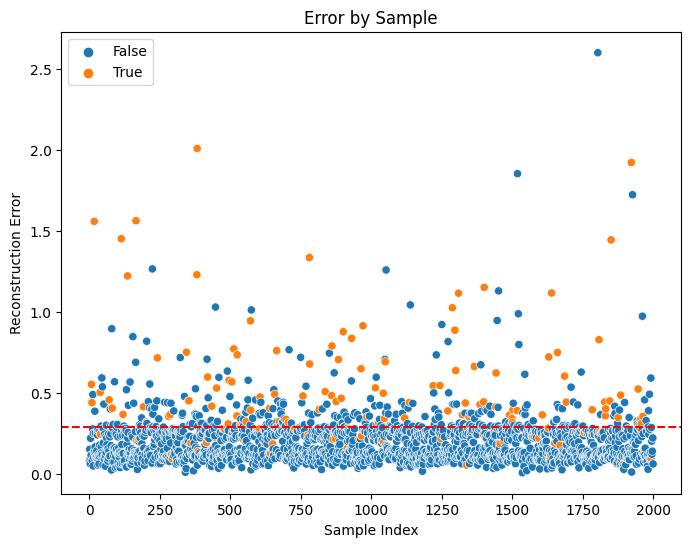

In [29]:
temp = recons_df.sample(frac=0.01, random_state=42).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.scatterplot(data=temp, x=temp.index, y='error', hue='y_true')
plt.axhline(y=threshold, color='r', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Error by Sample')
plt.legend()
plt.show()

The red dashed line represents the threshold. Only 1% of testing data is plotted, for a clearer visualization. 
* Most blue markers (representing genuine transactions) are concentrated below the threshold
* Above the threshold, more orange markers appear, indicating fraud transactions

# Classification

In [30]:
recons_df['y_pred'] = recons_df['error'] > threshold
recons_df.head()

,error,y_true,y_pred
0,0.115347,False,False
1,0.060502,False,False
2,0.302714,True,True
3,0.095729,False,False
4,0.291369,False,True


In [31]:
print(classification_report(recons_df['y_true'],recons_df['y_pred']))

              precision    recall  f1-score   support

       False       0.96      0.84      0.90    182538
        True       0.29      0.65      0.40     17462

    accuracy                           0.83    200000
   macro avg       0.62      0.75      0.65    200000
weighted avg       0.90      0.83      0.85    200000



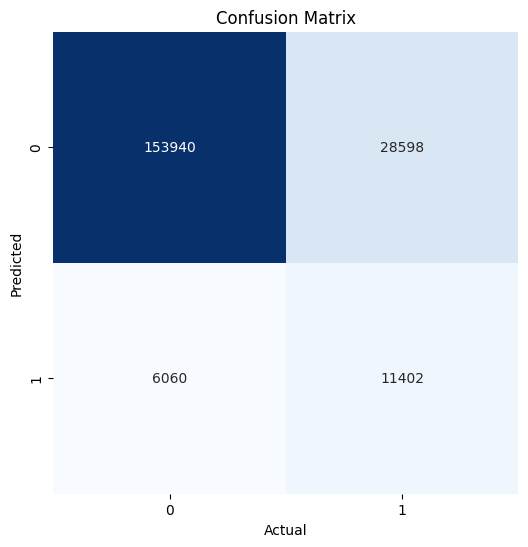

In [32]:
cm = confusion_matrix(recons_df['y_true'],recons_df['y_pred'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.6g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Results

In [33]:
print(f"Recall Score: {recall_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")
print(f"Accuracy Score: {accuracy_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")

Recall Score: 65.296%
Accuracy Score: 82.671%



## ✅ Results & Conclusion

After training the autoencoder on only genuine transactions, we evaluated its ability to detect fraud based on reconstruction error. The key metric here was **how well the model could distinguish anomalies using an appropriate threshold**.

---

### 📊 Performance Metrics

- **Accuracy**: 82.67%  
- **Recall (for fraud)**: 65.3%  
- **Precision (for fraud)**: 29%  
- **F1 Score (for fraud)**: 40%

While precision is modest (reflecting some false positives), the **recall is reasonably strong** — which is often more important in fraud detection, where missing a fraudulent transaction can be very costly.

---

### 🔍 Interpretation

- The **reconstruction error plot** clearly showed that many fraudulent transactions produced higher errors than genuine ones — validating the model’s design.
- By tuning the reconstruction threshold, we were able to optimize a trade-off between **detecting more frauds** (recall) and **reducing false alarms** (precision).
- The **confusion matrix** revealed that out of 17,462 fraud cases, the model correctly identified 11,402 — a notable improvement over random guessing in such an imbalanced dataset.

---

### 🧠 Takeaways

- **Autoencoders** can be powerful tools for fraud detection when labels are limited or imbalanced.
- They are particularly well-suited for **anomaly detection problems** where normal behavior can be learned and deviations flagged.
- Careful **threshold selection** is key — and often requires balancing operational risk (false negatives) with user experience (false positives).

This project shows how a relatively simple deep learning model, when paired with good preprocessing and thoughtful evaluation, can yield meaningful results on a complex real-world problem.


